In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/archive (1).zip"
extract_path = "/content/iris_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)



['Iris.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("/content/iris_data/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['Species'].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df = df.drop(columns=["Id"], errors="ignore")


In [ ]:
X = df.drop("Species", axis=1)
y = df["Species"]


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



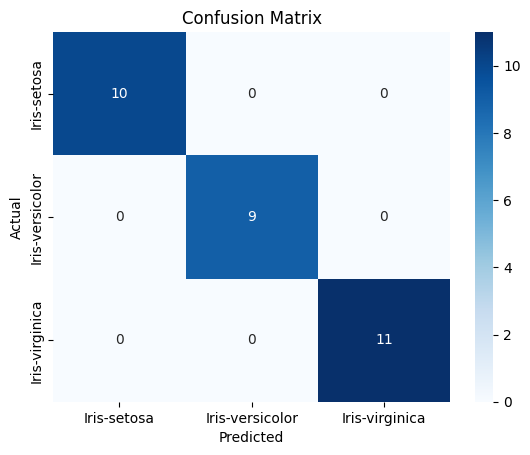

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# K-Nearest Neighbors (KNN) Classifier
# This model classifies a data point based on the majority class of its nearest neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on test data
y_pred_knn = knn.predict(X_test)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 1.0


In [ ]:
# Support Vector Machine (SVM) Classifier
# This model finds an optimal hyperplane that separates different classes

from sklearn.svm import SVC

# Initialize SVM with linear kernel
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 1.0


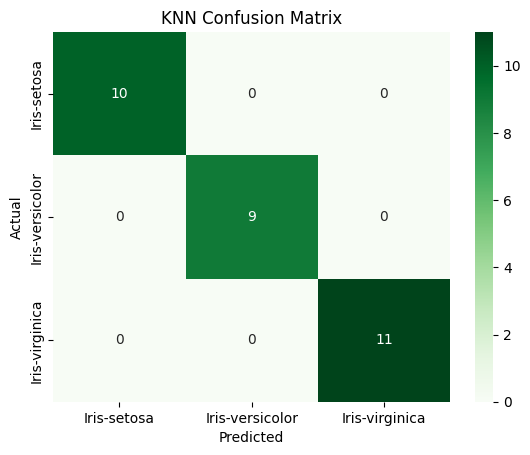

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


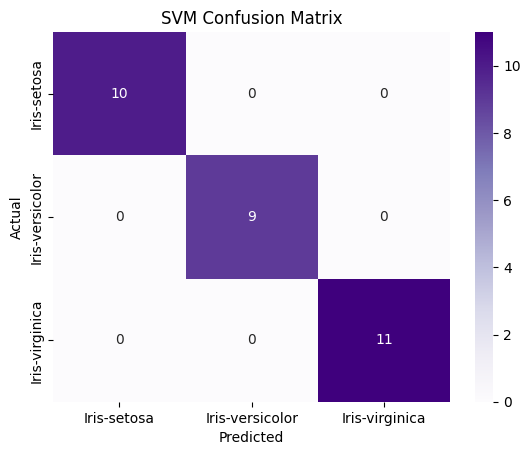

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
models = {
    "Logistic Regression": accuracy,
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

for model, acc in models.items():
    print(f"{model}: {acc}")


Logistic Regression: 1.0
KNN: 1.0
SVM: 1.0


In [ ]:
from sklearn.metrics import f1_score

# Calculate F1-score for KNN and SVM (macro average)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print("KNN F1-score (Macro):", f1_knn)
print("SVM F1-score (Macro):", f1_svm)



KNN F1-score (Macro): 1.0
SVM F1-score (Macro): 1.0


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# ---- Logistic Regression metrics ----
accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred, average='macro')

# ---- KNN metrics ----
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# ---- SVM metrics ----
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

# ---- Comparison Table ----
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "SVM"],
    "Accuracy": [accuracy_lr, accuracy_knn, accuracy_svm],
    "F1-score": [f1_lr, f1_knn, f1_svm]
})

comparison_df


,Model,Accuracy,F1-score
0,Logistic Regression,1.0,1.0
1,KNN,1.0,1.0
2,SVM,1.0,1.0


# **SHAP** (SHapley Additive explanations)



In [ ]:
!pip install shap


In [ ]:
from sklearn.linear_model import LogisticRegression

# Re-create Logistic Regression model explicitly
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

### SHAP (SHapley Additive exPlanations) is used to interpret the model
### It explains how each feature contributes to the prediction


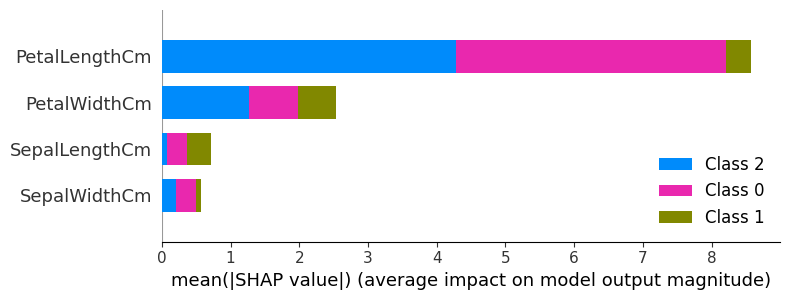

In [ ]:
import shap

# Use SHAP's general explainer (works reliably)
explainer = shap.Explainer(lr_model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
